# Map plot

This script plots some locations of subglacial lakes on top of the ICESat-2 ATL15 data map

In [1]:
import sys
sys.path.insert(0, '../source')
sys.path.insert(0, '../scripts')

from matplotlib.colors import to_hex
from load_lakes import gdf
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import griddata


# # import the ATL15 data. edit the path to the data as appropriate
fn = '/Users/agstubbl/Desktop/ICESat-2/ATL15_A3_0321_01km_004_01.nc'
fn2 = '/Users/agstubbl/Desktop/ICESat-2/ATL15_A4_0321_01km_004_01.nc'
ds = nc.Dataset(fn)
dsh = ds['delta_h']

ds2 = nc.Dataset(fn2)
dsh2 = ds2['delta_h']

# define some variables
dh = dsh['delta_h'][:]        # elevation change (m)
x = dsh['x'][:]               # x coordinate array (m)
y = dsh['y'][:]               # y coordinate array (m)
mask = dsh['ice_area'][:]
t = dsh['time'][:]            # y coordinate array (m)

dh2 = dsh2['delta_h'][:]        # elevation change (m)
x2_ = dsh2['x'][:]               # x coordinate array (m)
y2_ = dsh2['y'][:]               # y coordinate array (m)
mask2 = dsh2['ice_area'][:]


In [2]:
# Select subglacial lakes from inventory

# Byrd_s10 coordinates
lake_name = 'Byrd_s10'
outline = gdf.loc[gdf['name'] == lake_name]
xB = float(outline.centroid.x.iloc[0])*1e3
yB = float(outline.centroid.y.iloc[0])*1e3


# David_s1
lake_name = 'David_s1'
outline = gdf.loc[gdf['name'] == lake_name]
xS = float(outline.centroid.x.iloc[0])*1e3
yS = float(outline.centroid.y.iloc[0])*1e3

# Mac1
lake_name = 'Mac1'
outline = gdf.loc[gdf['name'] == lake_name]
xMa = float(outline.centroid.x.iloc[0])*1e3
yMa = float(outline.centroid.y.iloc[0])*1e3


# Mercer
lake_name = 'MercerSubglacialLake'
outline = gdf.loc[gdf['name'] == lake_name]
xMe = float(outline.centroid.x.iloc[0])*1e3
yMe = float(outline.centroid.y.iloc[0])*1e3

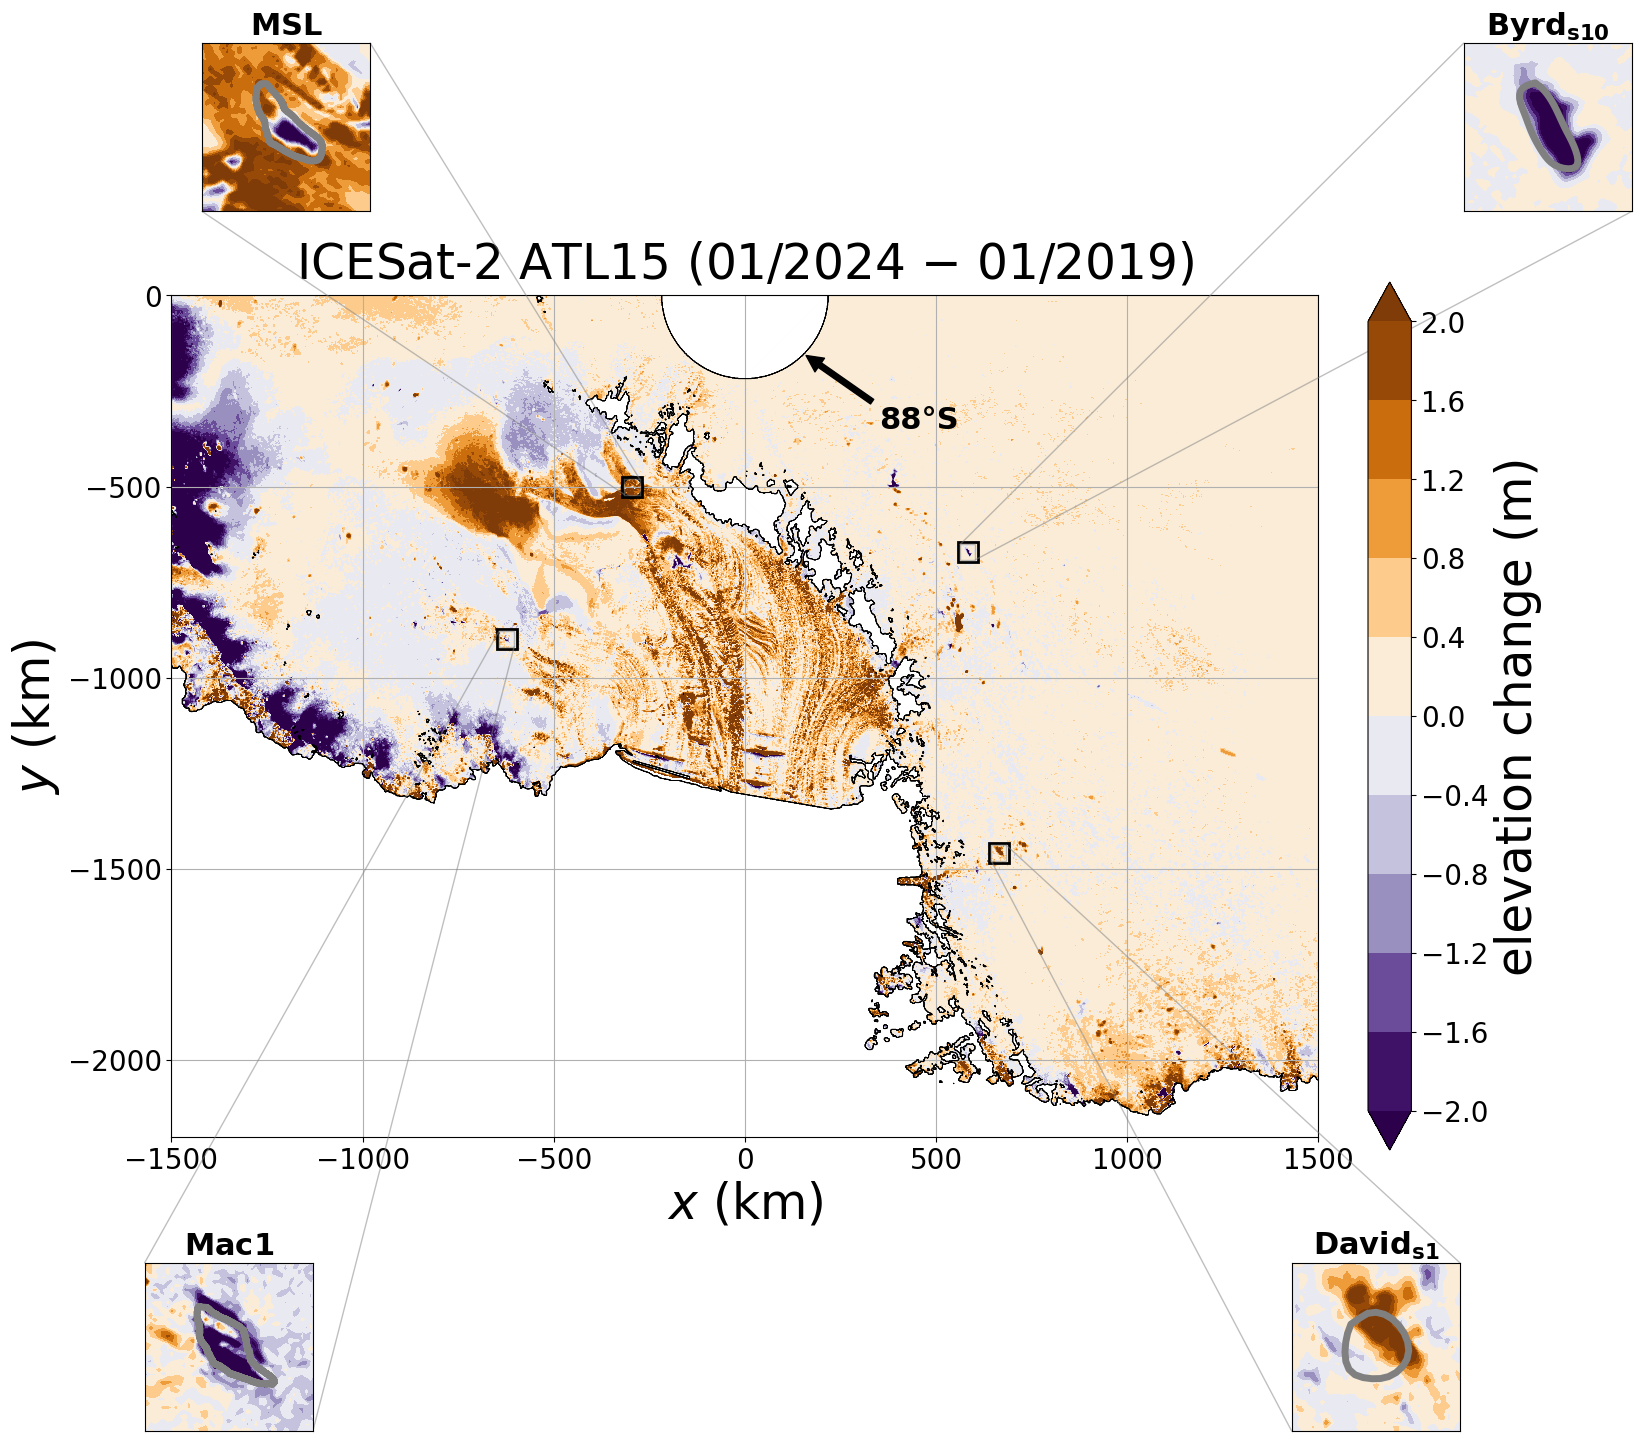

In [4]:
# Plot lake locations on map of elevation change!
ticks_y = np.arange(-2000,2001,500)
ticks_x = np.arange(-2500,2501,500)
points_x = np.array([xB, xS, xMa, xMe])/1e3
points_y = np.array([yB, yS, yMa, yMe])/1e3
dh_0 = dh[-1, :, :]-dh[0, :, :]
dh2_0 = dh2[-1, :, :]-dh2[0, :, :]
mask_0 = mask[-1, :, :].filled()
mask2_0 = mask2[-1, :, :].filled()
plt.figure(figsize=(16, 16))
plt.title(r'ICESat-2 ATL15 (01/2024 $-$ 01/2019)', y=1.01,fontsize=35)
plt.annotate(xy=(150,-150),xytext=(350,-350),text='88°S',fontsize=22,weight='bold',arrowprops=dict(facecolor='black', shrink=0.05))
p1 = plt.contourf(x/1000, y/1000, dh_0, cmap='PuOr_r',levels=np.linspace(-2,2,11), extend='both')
plt.contourf(x2_/1000, y2_/1000, dh2_0, cmap='PuOr_r',levels=np.linspace(-2,2,11), extend='both')
plt.plot([points_x[-1]], [points_y[-1]], marker=r'o',markerfacecolor='none', color='k', markersize=15,markeredgewidth=2)
plt.plot([points_x[0]], [points_y[0]], marker=r's',markerfacecolor='none', color='k', markersize=15,markeredgewidth=2)
plt.plot([points_x[1]], [points_y[1]], marker=r's',markerfacecolor='none',color='k', markersize=15,markeredgewidth=2)
plt.plot([points_x[2]], [points_y[2]], marker=r's', markerfacecolor='none',color='k', markersize=15,markeredgewidth=2)
plt.plot([points_x[3]], [points_y[3]], marker=r's', markerfacecolor='none',color='k', markersize=15,markeredgewidth=2)
plt.contour(x/1000, y/1000, mask_0, colors='k', linewidths=0.5)
plt.contour(x2_/1000, y2_/1000, mask2_0, colors='k', linewidths=0.5)
plt.yticks(ticks_y,fontsize=20)
plt.xticks(ticks_x,fontsize=20)
plt.ylabel(r'$y$ (km)', fontsize=35)
plt.xlabel(r'$x$ (km)', fontsize=35)
plt.gca().set_aspect('equal', 'box')
plt.grid()
cbar = plt.colorbar(p1, ticks=np.linspace(-2,2,11),
                    orientation='vertical', fraction=0.035, pad=0.04)
cbar.set_label(r'elevation change (m)', fontsize=35)
cbar.ax.tick_params(labelsize=20)
#INSET 1: Byrd-s10
axins = plt.gca().inset_axes([1.1, 1.1, 0.2, 0.2])
axins.contourf(x2_/1000, y2_/1000, dh2_0, cmap='PuOr_r',
                  levels=np.linspace(-2,2,11), extend='both')
x1, x2, y1, y2 = points_x[0]-20, points_x[0]+20, points_y[0]-20, points_y[0]+20
outline = gdf.loc[gdf['name']=='Byrd_s10']
outline.plot(edgecolor='gray',facecolor='none',ax=axins,linewidth=5,linestyle='-')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_xticks([])
axins.set_yticks([])
axins.set_title(r'$\mathrm{\mathbf{Byrd_{s10}}}$', fontsize=22)
axins.set_aspect('equal', 'box')
plt.gca().indicate_inset_zoom(axins, edgecolor="gray")
#INSET 2: David-s1
axins = plt.gca().inset_axes([0.95, -0.35, 0.2, 0.2])
axins.contourf(x2_/1000, y2_/1000, dh2_0, cmap='PuOr_r',
                  levels=np.linspace(-2,2,11), extend='both')
x1, x2, y1, y2 = points_x[1]-20, points_x[1]+20, points_y[1]-20, points_y[1]+20
outline = gdf.loc[gdf['name']=='David_s1']
outline.plot(edgecolor='gray',facecolor='none',ax=axins,linewidth=5,linestyle='-')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_xticks([])
axins.set_yticks([])
axins.set_title(r'$\mathrm{\mathbf{David_{s1}}}$', fontsize=22)
axins.set_aspect('equal', 'box')
plt.gca().indicate_inset_zoom(axins, edgecolor="gray")
#INSET 3: Mac1
axins = plt.gca().inset_axes([-0.05, -0.35, 0.2, 0.2])
axins.contourf(x/1000, y/1000, dh_0, cmap='PuOr_r',
                  levels=np.linspace(-2,2,11), extend='both')
x1, x2, y1, y2 = points_x[2]-20, points_x[2]+20, points_y[2]-20, points_y[2]+20
outline = gdf.loc[gdf['name']=='Mac1']
outline.plot(edgecolor='gray',facecolor='none',ax=axins,linewidth=5,linestyle='-')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([])
axins.set_yticks([])
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_title(r'$\mathrm{\mathbf{Mac1}}$', fontsize=22)
axins.set_aspect('equal', 'box')
plt.gca().indicate_inset_zoom(axins, edgecolor="gray")
#INSET 4: Mercer
axins = plt.gca().inset_axes([0.0, 1.1, 0.2, 0.2])
axins.contourf(x/1000, y/1000, dh_0, cmap='PuOr_r',
                  levels=np.linspace(-2,2,11), extend='both')
x1, x2, y1, y2 = points_x[3]-20, points_x[3]+20, points_y[3]-20, points_y[3]+20
outline = gdf.loc[gdf['name']=='MercerSubglacialLake']
outline.plot(edgecolor='gray',facecolor='none',ax=axins,linewidth=5,linestyle='-')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([])
axins.set_yticks([])
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_title(r'$\mathrm{\mathbf{MSL}}$', fontsize=22)
axins.set_aspect('equal', 'box')
plt.gca().indicate_inset_zoom(axins, edgecolor="gray")
plt.ylim(-2200,0)
plt.xlim(-1500,1500)
plt.savefig('fig2', bbox_inches='tight')
plt.show()
plt.close()
